- Crear una señal de datos
- Separar la señal por pares de bits
- Codificar la señal

# Codificar En Huffman

In [370]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import square
from collections import Counter
import heapq
from itertools import count

class _Node:
    __slots__ = ("freq", "char", "left", "right")
    def __init__(self, freq, char=None, left=None, right=None):
        self.freq = freq
        self.char = char
        self.left = left
        self.right = right

def _build_huffman_tree(message: str) -> _Node:
    """
    Construye el árbol de Huffman para el mensaje.
    Maneja el caso borde de un único símbolo en el mensaje.
    """
    if not message:
        raise ValueError("El mensaje no puede ser vacío.")

    freq = Counter(message)
    pq, tie = [], count()
    for ch, f in freq.items():
        # (frecuencia, orden, nodo)
        heapq.heappush(pq, (f, next(tie), _Node(f, char=ch)))

    # Caso especial: solo un símbolo -> crea un árbol con un hijo
    if len(pq) == 1:
        f, _, node = heapq.heappop(pq)
        root = _Node(f, left=node, right=None)
        return root

    while len(pq) > 1:
        f1, _, n1 = heapq.heappop(pq)
        f2, _, n2 = heapq.heappop(pq)
        parent = _Node(f1 + f2, left=n1, right=n2)
        heapq.heappush(pq, (parent.freq, next(tie), parent))

    return heapq.heappop(pq)[2]

def _build_codes(root: _Node) -> dict:
    """
    Recorre el árbol y genera el diccionario {caracter: código_en_bits}.
    """
    codes = {}

    def dfs(node, path):
        if node.char is not None:          # hoja
            codes[node.char] = path or "0" # si hay un solo símbolo, asígnale "0"
            return
        if node.left:
            dfs(node.left, path + "0")
        if node.right:
            dfs(node.right, path + "1")

    dfs(root, "")
    return codes

def huffman_encode(message: str):
    """
    Codifica `message` con Huffman.
    Returns:
        bits: str  -> secuencia de '0' y '1'
        codes: dict -> mapa {caracter: código}
    """
    root = _build_huffman_tree(message)
    codes = _build_codes(root)
    bits = "".join(codes[ch] for ch in message)
    return bits, codes

def huffman_decode(bits: str, codes: dict) -> str:
    """
    Decodifica la secuencia de bits usando el diccionario de códigos.
    """
    if not bits and codes:
        return ""  # nada que decodificar

    # Para decodificar eficientemente, invertimos el diccionario
    inv = {code: ch for ch, code in codes.items()}

    out = []
    acc = ""
    for b in bits:
        acc += b
        if acc in inv:
            out.append(inv[acc])
            acc = ""
    if acc:
        raise ValueError("Bits sobrantes: el flujo de bits no coincide con los códigos.")
    return "".join(out)

msg = "Hola Mundo"
bits, codes = huffman_encode(msg)
print("Bits:", bits)
print("Códigos:", codes)
print("Decodificado:", huffman_decode(bits, codes))




Bits: 11101101111000001010011100101110
Códigos: {'a': '000', ' ': '001', 'M': '010', 'u': '011', 'n': '100', 'd': '101', 'o': '110', 'H': '1110', 'l': '1111'}
Decodificado: Hola Mundo


# Creacion de Mensaje

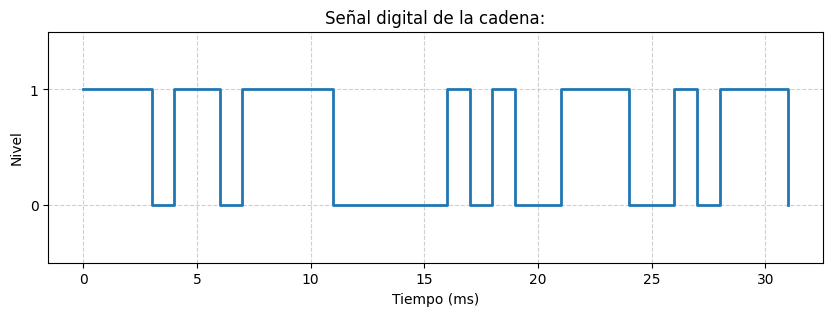

In [382]:

def graficar_bits(bits):
    # Crear 100 muestras por bit y al final unirlas
    for b in bits:
        if b == '0':
            segmento = np.zeros(1)
        else:
            segmento = np.ones(1)
        if 'y' in locals():
            y = np.concatenate((y, segmento))
        else:
            y = segmento
    # Crear la forma escalonada
    t=np.arange(0, len(bits)*1)  # Tiempo en ms
    plt.figure(figsize=(10, 3))
    plt.step(t, y, where='post', linewidth=2)
    plt.ylim(-0.5, 1.5)
    plt.yticks([0, 1])
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Nivel')
    plt.title(f'Señal digital de la cadena:')
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    plt.show()
    return t, y

# Ejemplo de uso
cadena = bits
t, señal=graficar_bits(cadena)
longitud_señal = len(señal)


# Creacion del delay

['11', '10', '11', '01', '11', '10', '00', '00', '10', '10', '01', '11', '00', '10', '11', '10']


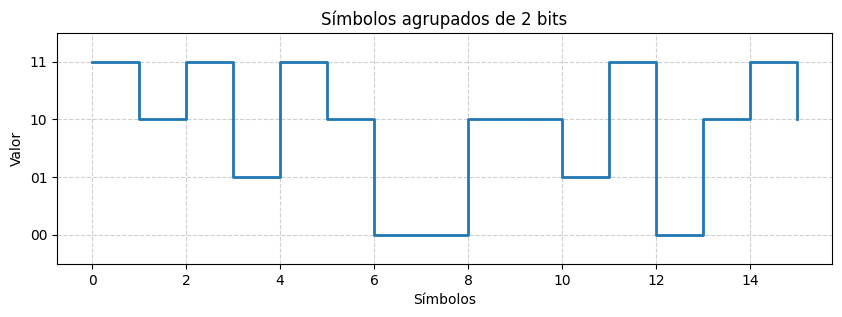

[(1, 1), (1, -1), (1, 1), (-1, 1), (1, 1), (1, -1), (-1, -1), (-1, -1), (1, -1), (1, -1), (-1, 1), (1, 1), (-1, -1), (1, -1), (1, 1), (1, -1)]


In [378]:
# Agrupar de a dos en dos bits sabiendo que la señal cambia cada 50/len(cadena) muestras a partir de la señal generada anteriormente
def agrupar_bits(señal, duracion_bit, num_bits=2):
    simbolos = []
    muestras_por_simbolo = duracion_bit * num_bits
    for i in range(0, len(señal), muestras_por_simbolo):
        bits_simbolo = ''
        for j in range(num_bits):
            inicio = i + j * duracion_bit
            fin = inicio + duracion_bit
            if fin <= len(señal):
                bit = '1' if np.mean(señal[inicio:fin]) > 0.5 else '0'
                bits_simbolo += bit
        if len(bits_simbolo) == num_bits:
            simbolos.append(bits_simbolo)
    return simbolos
simbolos = agrupar_bits(señal, duracion_bit=1, num_bits=2)
print(simbolos)
# Graficar los simbolos agrupados
def graficar_simbolos(simbolos):
    plt.figure(figsize=(10, 3))
    plt.step(range(len(simbolos)), [int(s, 2) for s in simbolos], where='post', linewidth=2)
    plt.ylim(-0.5, 3.5)
    plt.yticks(range(4), ['00', '01', '10', '11'])
    plt.xlabel('Símbolos')
    plt.ylabel('Valor')
    plt.title('Símbolos agrupados de 2 bits')
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    plt.show()
graficar_simbolos(simbolos)
# mapear los simbolos a 4QAM
def mapear_4QAM(simbolos):
    mapping = {
        '00': (-1, -1),
        '01': (-1, 1),
        '10': (1, -1),
        '11': (1, 1)
    }
    señales_4QAM = [mapping[s] for s in simbolos]
    return señales_4QAM
señales_4QAM = mapear_4QAM(simbolos)
print(señales_4QAM)


# Crear Portadora a 4Mhz

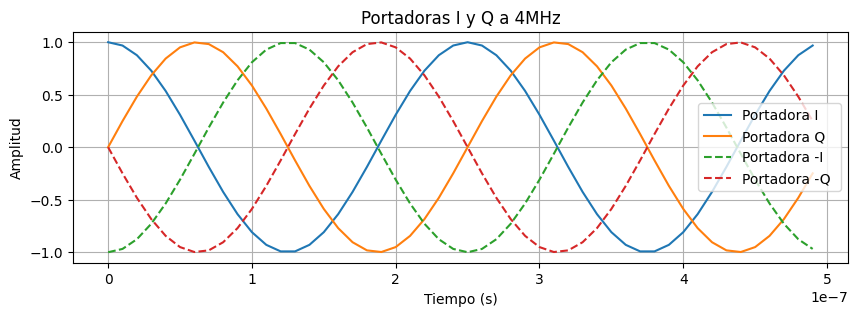

In [391]:
# crear portadora de 4Mhz y sus desfases
fs = 100000000  # frecuencia de muestreo 1MHz
fc = 4000000  # frecuencia de la portadora 4MHz
# Calcular compensacion de fase para la modulacion se de en fase 0 en el inicio de la señal
compensacion = 0
t_portadora = np.arange(0, len(t)/1000, 1/fs)
portadora_I = np.cos(2 * np.pi * fc * t_portadora+ compensacion)
portadora_Q = np.sin(2 * np.pi * fc * t_portadora+ compensacion)
portadora_Minus_I = np.cos(2 * np.pi * fc * t_portadora+ np.pi + compensacion)
portadora_Minus_Q = np.sin(2 * np.pi * fc * t_portadora+ np.pi + compensacion)
# Graficar portadoras
plt.figure(figsize=(10, 3))
plt.plot(t_portadora[:50], portadora_I[:50], label='Portadora I ')
plt.plot(t_portadora[:50], portadora_Q[:50], label='Portadora Q ')
plt.plot(t_portadora[:50], portadora_Minus_I[:50], label='Portadora -I ', linestyle='--')
plt.plot(t_portadora[:50], portadora_Minus_Q[:50], label='Portadora -Q ', linestyle='--')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Portadoras I y Q a 4MHz')
plt.legend()
plt.grid(True)
plt.show()

# Selector de portadora

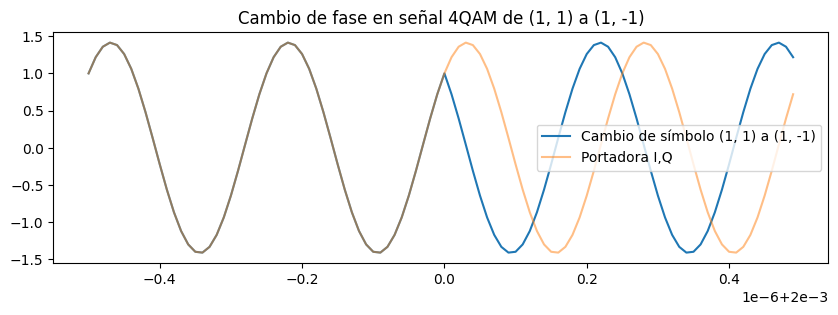

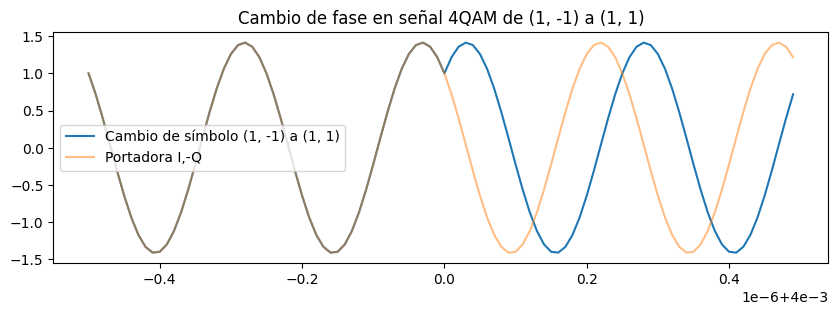

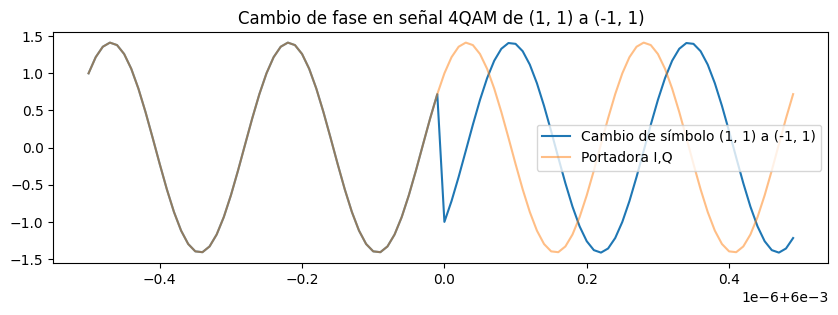

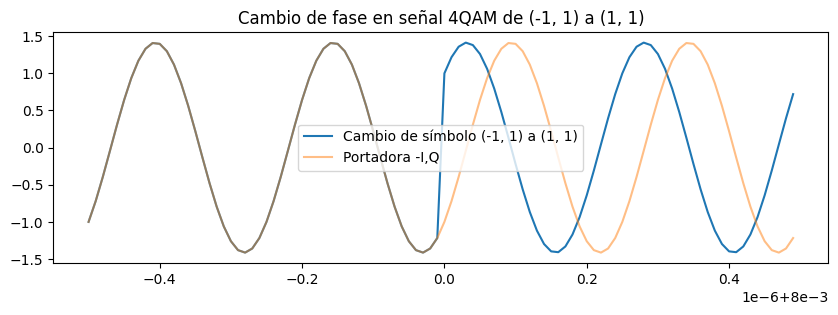

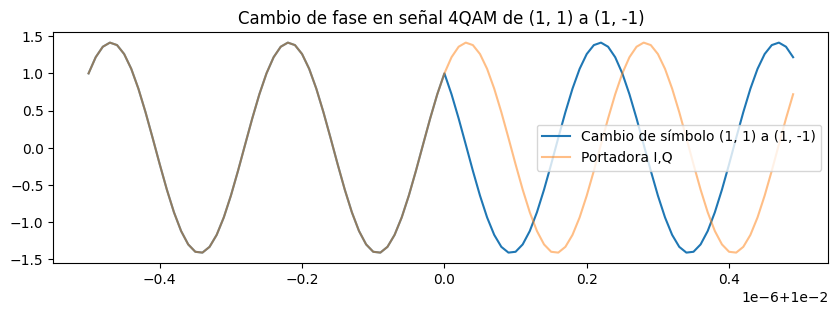

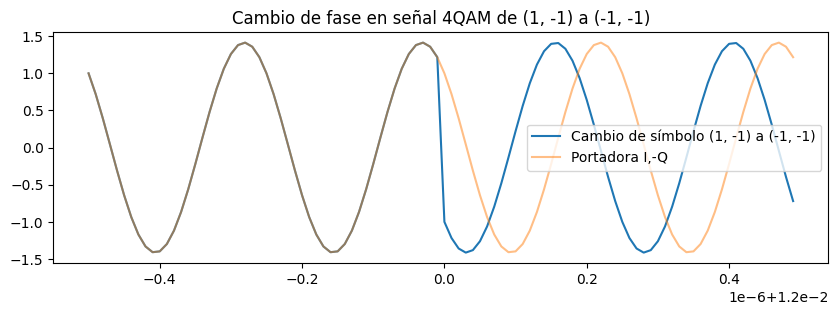

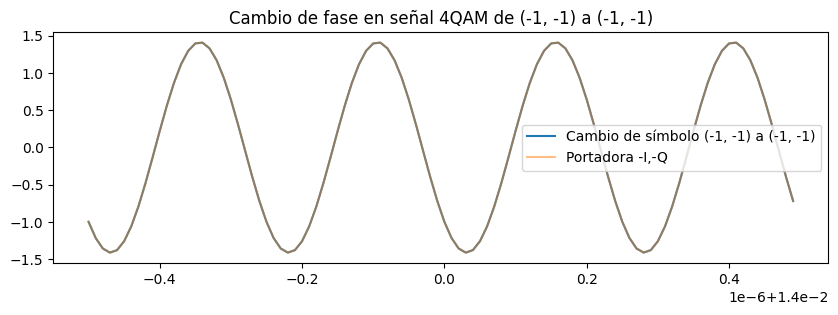

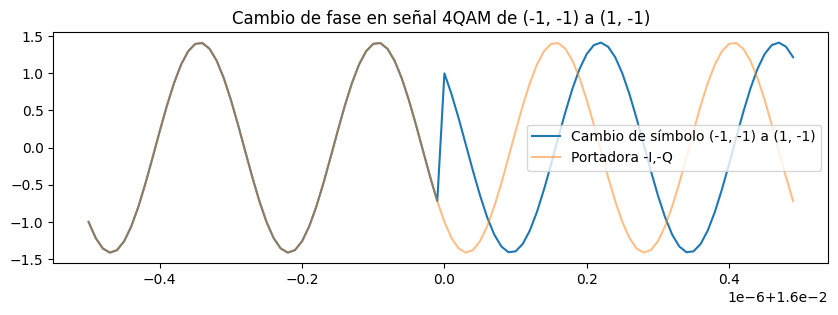

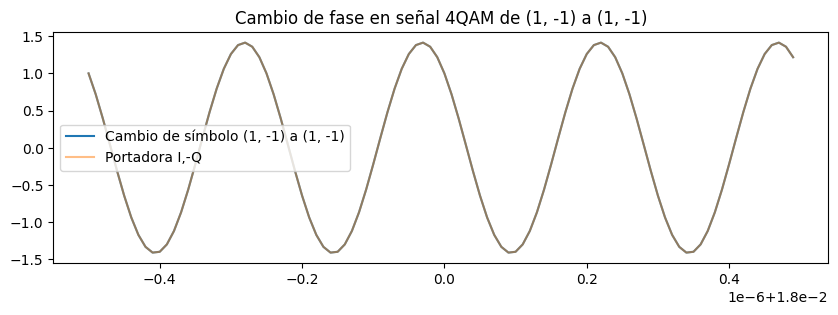

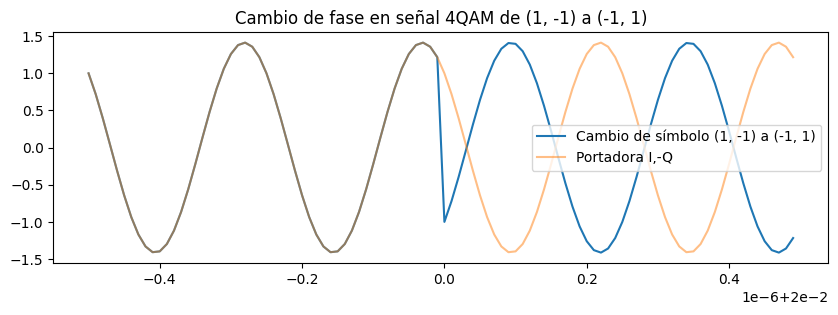

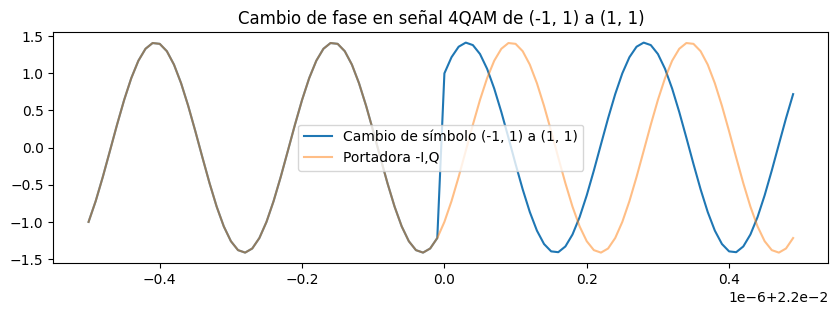

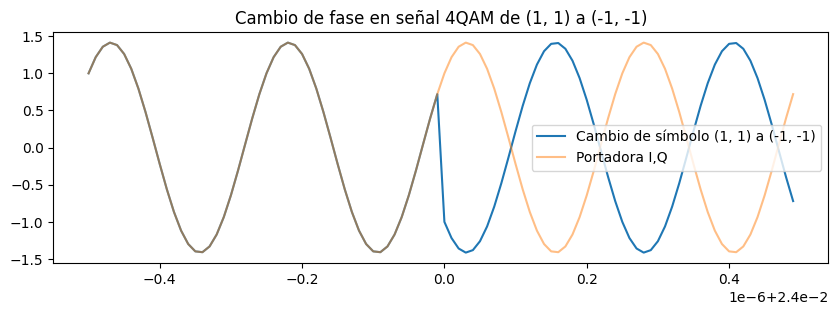

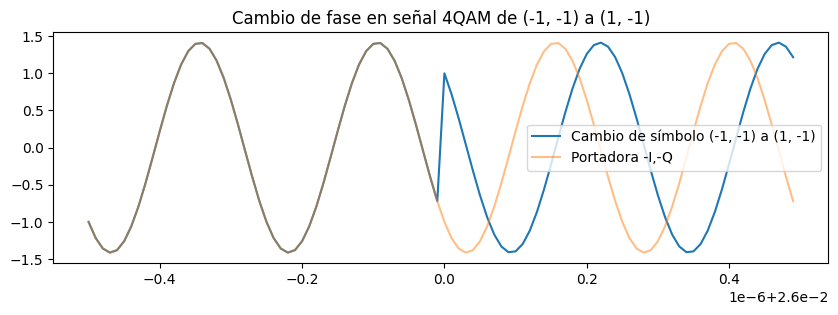

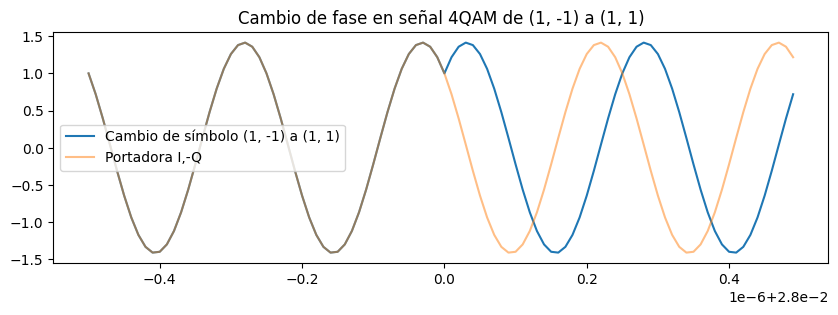

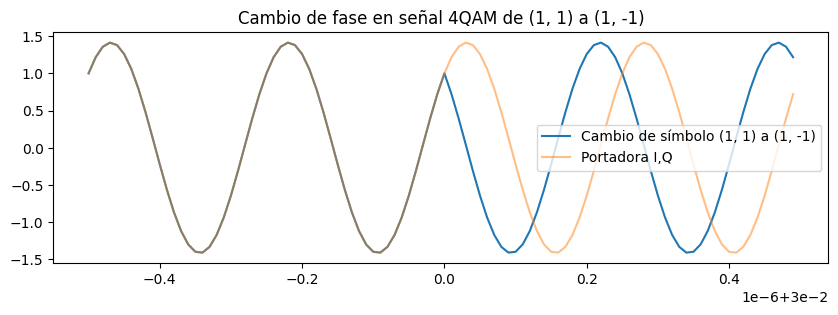

C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


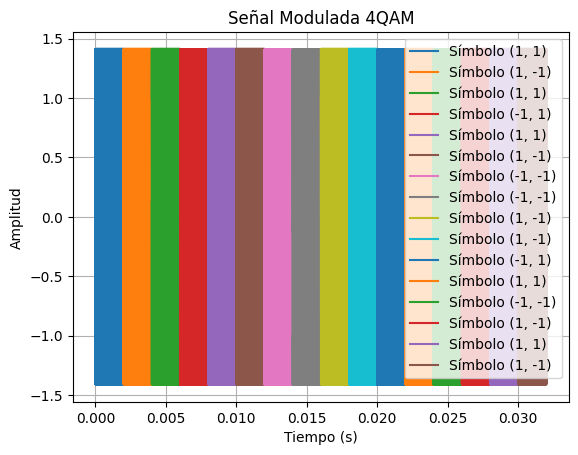

In [392]:
# Seleccionar la portadora según el símbolo 4QAM
def modular_4QAM(señales_4QAM, t_portadora, portadora_I, portadora_Q, portadora_Minus_I, portadora_Minus_Q):
    señal_modulada = np.zeros(len(t_portadora))
    muestras_por_simbolo = int(len(t_portadora) / len(señales_4QAM))
    for i, (I, Q) in enumerate(señales_4QAM):
        start = i * muestras_por_simbolo
        end = start + muestras_por_simbolo
        if I == 1 and Q == 1:
            señal_modulada[start:end] = portadora_I[start:end]+portadora_Q[start:end]
        elif I == 1 and Q == -1:
            señal_modulada[start:end] = portadora_Minus_Q[start:end]+portadora_I[start:end]
        elif I == -1 and Q == 1:
            señal_modulada[start:end] = portadora_Minus_I[start:end]+portadora_Q[start:end]
        elif I == -1 and Q == -1:
            señal_modulada[start:end] = portadora_Minus_Q[start:end]+portadora_Minus_I[start:end]
    return señal_modulada
señal_4QAM = modular_4QAM(señales_4QAM, t_portadora, portadora_I, portadora_Q, portadora_Minus_I, portadora_Minus_Q)
# Graficar señal modulada 4QAM

# Graficar todos los cambios de fase
for i in range(len(señales_4QAM)-1):
    start = (i+1) * int(len(t_portadora) / len(señales_4QAM))
    plt.figure(figsize=(10, 3))
    plt.plot(t_portadora[start-50:start+50], señal_4QAM[start-50:start+50], label=f'Cambio de símbolo {señales_4QAM[i]} a {señales_4QAM[i+1]}')
    if(True):
        if señales_4QAM[i] == (1, 1):
            plt.plot(t_portadora[start-50:start+50], (portadora_I+portadora_Q)[start-50:start+50], label='Portadora I,Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Q[start-50:start+50], label='Portadora Q ')
        elif señales_4QAM[i] == (1, -1):
            plt.plot(t_portadora[start-50:start+50], (portadora_I+portadora_Minus_Q)[start-50:start+50], label='Portadora I,-Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Minus_Q[start-50:start+50], label='Portadora -Q ')
        elif señales_4QAM[i] == (-1, 1):
            plt.plot(t_portadora[start-50:start+50], (portadora_Minus_I+portadora_Q)[start-50:start+50], label='Portadora -I,Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Q[start-50:start+50], label='Portadora Q ')
        elif señales_4QAM[i] == (-1, -1):
            plt.plot(t_portadora[start-50:start+50], (portadora_Minus_I+portadora_Minus_Q)[start-50:start+50], label='Portadora -I,-Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Minus_Q[start-50:start+50], label='Portadora -Q ')
    if(False):
        if señales_4QAM[i+1] == (1, 1):
            plt.plot(t_portadora[start-50:start+50], (portadora_I+portadora_Q)[start-50:start+50], label='Portadora I,Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Q[start-50:start+50], label='Portadora Q ')
        elif señales_4QAM[i+1] == (1, -1):
            plt.plot(t_portadora[start-50:start+50], (portadora_I+portadora_Minus_Q)[start-50:start+50], label='Portadora I,-Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Minus_Q[start-50:start+50], label='Portadora -Q ')
        elif señales_4QAM[i+1] == (-1, 1):
            plt.plot(t_portadora[start-50:start+50], (portadora_Minus_I+portadora_Q)[start-50:start+50], label='Portadora -I,Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Q[start-50:start+50], label='Portadora Q ')
        elif señales_4QAM[i+1] == (-1, -1):
            plt.plot(t_portadora[start-50:start+50], (portadora_Minus_I+portadora_Minus_Q)[start-50:start+50], label='Portadora -I,-Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Minus_Q[start-50:start+50], label='Portadora -Q ')
        
    plt.title('Cambio de fase en señal 4QAM'+f' de {señales_4QAM[i]} a {señales_4QAM[i+1]}')
    plt.legend()
    plt.show()
plt.figure()
for i in range(len(señales_4QAM)):
    start = i * int(len(t_portadora) / len(señales_4QAM))
    end = start + int(len(t_portadora) / len(señales_4QAM))
    plt.plot(t_portadora[start:end], señal_4QAM[start:end], label=f'Símbolo {señales_4QAM[i]}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Modulada 4QAM')
plt.legend()
plt.grid(True)
plt.show()


# Multiplicacion por 4Mhz

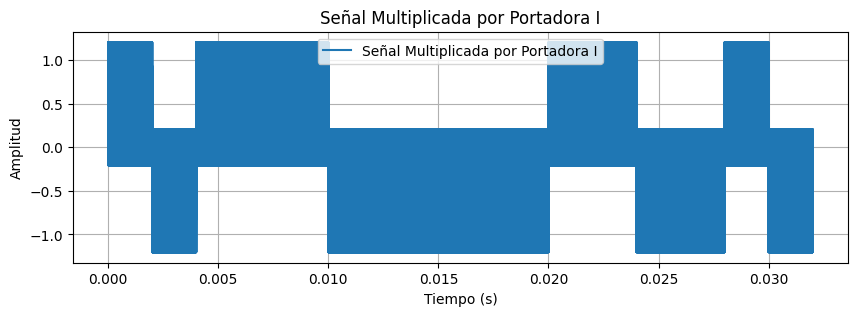

In [393]:
# Multiplicar señal modulada por portadora 4Mhz
señal_multiplicada = señal_4QAM * portadora_Q
# Graficar señal multiplicada
plt.figure(figsize=(10, 3))
plt.plot(t_portadora, señal_multiplicada, label='Señal Multiplicada por Portadora I')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Multiplicada por Portadora I')
plt.legend()
plt.grid(True)
plt.show()